In [1]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], 'C:/Users/tijmen.vanetten/Documents/emobility-vanetten/src'))  

In [2]:
import pandas as pd 
from darts import TimeSeries

def select_complete_time_series(time_series_list):
    complete_time_series = []
    
    for time_series in time_series_list:
        nan_count = time_series.pd_series().isnull().sum()
        total_count = len(time_series)
        
        if nan_count / total_count <= 0.1 and total_count > 150:
            complete_time_series.append(time_series)
    
    return complete_time_series

import matplotlib.pyplot as plt

def plot_time_series_datasets(datasets):
    num_datasets = len(datasets)
    fig, axs = plt.subplots(num_datasets, 1, figsize=(10, 6*num_datasets), sharex=True)
    
    if num_datasets == 1:
        axs = [axs]  # Convert to a list if only one subplot

    for i, dataset in enumerate(datasets):
        time_series = dataset.univariate_component(0)
        axs[i].plot(time_series.time_index, time_series.values())
        axs[i].set_ylabel('Value')
        axs[i].set_title(f'Time Series {i+1}')
        
    axs[-1].set_xlabel('Time')

    plt.tight_layout()
    plt.show()


# Palo ALto

In [3]:
path='C:/Users/tijmen.vanetten/Documents/emobility-vanetten/data/03_processed/palo_alto_dataset.csv'


In [4]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path)

# Load time series per location (group_cols)
df_ts = TimeSeries.from_group_dataframe(
    df=df,
    time_col='date',
    static_cols=None,
    freq='D',
    value_cols='energy_delivered_kwh',
    group_cols='station_id',
    # fill_missing_dates=True,
)

df_ts_palo_alto = select_complete_time_series(df_ts)

In [14]:
print([len(series) for series in df_ts_palo_alto])

[3245, 3188, 1276, 1814, 1812, 1016, 1017, 3386, 3383, 1983, 1456, 1456, 3384, 2291, 2009, 2012, 2011, 1733, 1983, 1982, 1814]


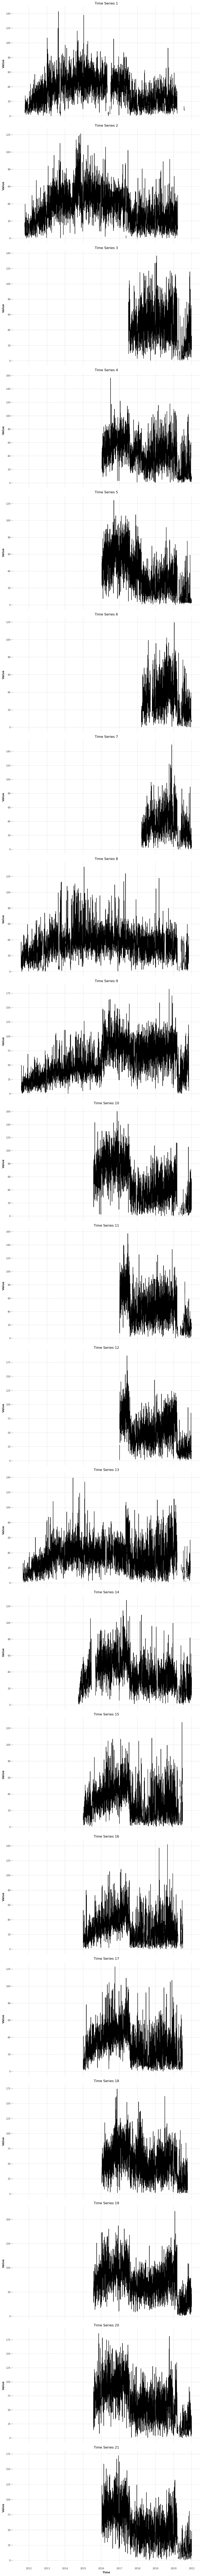

In [13]:
plot_time_series_datasets(df_ts_palo_alto)

# Shell

In [7]:
path='C:/Users/tijmen.vanetten/Documents/emobility-vanetten/data/03_processed/shell_dataset.csv'


# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path)

# Load time series per location (group_cols)
df_ts = TimeSeries.from_group_dataframe(
    df=df,
    time_col='date',
    static_cols=None,
    freq='D',
    value_cols='energy_delivered_kwh',
    group_cols='station_id',
    # fill_missing_dates=True,
)

df_ts_shell = select_complete_time_series(df_ts)

In [8]:
print([len(series) for series in df_ts_shell])

[1035, 1035, 1035, 1035, 198, 900, 1035, 1034, 1035, 1015, 206, 1032, 304, 1035, 1034, 729, 746, 735, 350, 568, 432, 488, 706, 658, 636, 235, 209, 186]


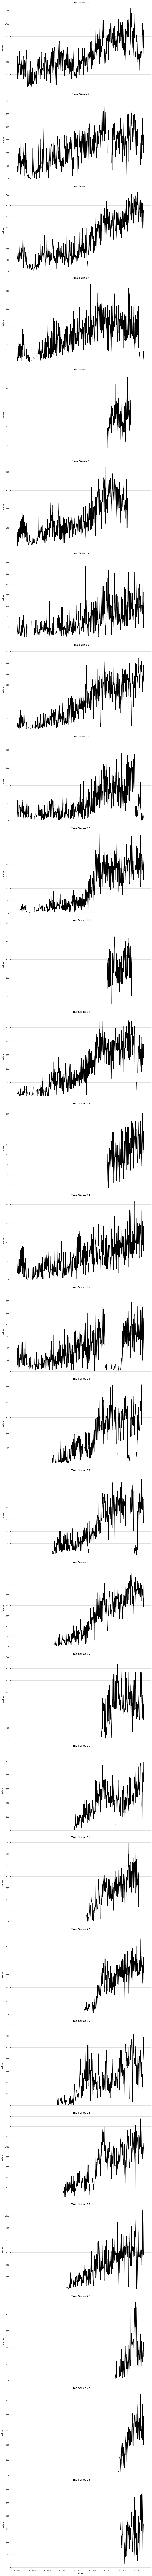

In [9]:
plot_time_series_datasets(df_ts_shell)

# Boulder

In [10]:
path='C:/Users/tijmen.vanetten/Documents/emobility-vanetten/data/03_processed/boulder_dataset.csv'


# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path)

# Load time series per location (group_cols)
df_ts = TimeSeries.from_group_dataframe(
    df=df,
    time_col='date',
    static_cols=None,
    freq='D',
    value_cols='energy_delivered_kwh',
    group_cols='station_id',
    fill_missing_dates=True,
)

df_ts_boulder = select_complete_time_series(df_ts)

In [11]:
print([len(series) for series in df_ts])

[827, 1914, 1831, 1911, 1914, 1659, 1683, 975, 954, 1538, 1911, 584, 1683, 148, 163, 1582, 1876, 1061, 1048, 481, 483, 180, 1892, 1901, 1821, 1892, 1892, 1888, 1911, 1574, 356, 1666]


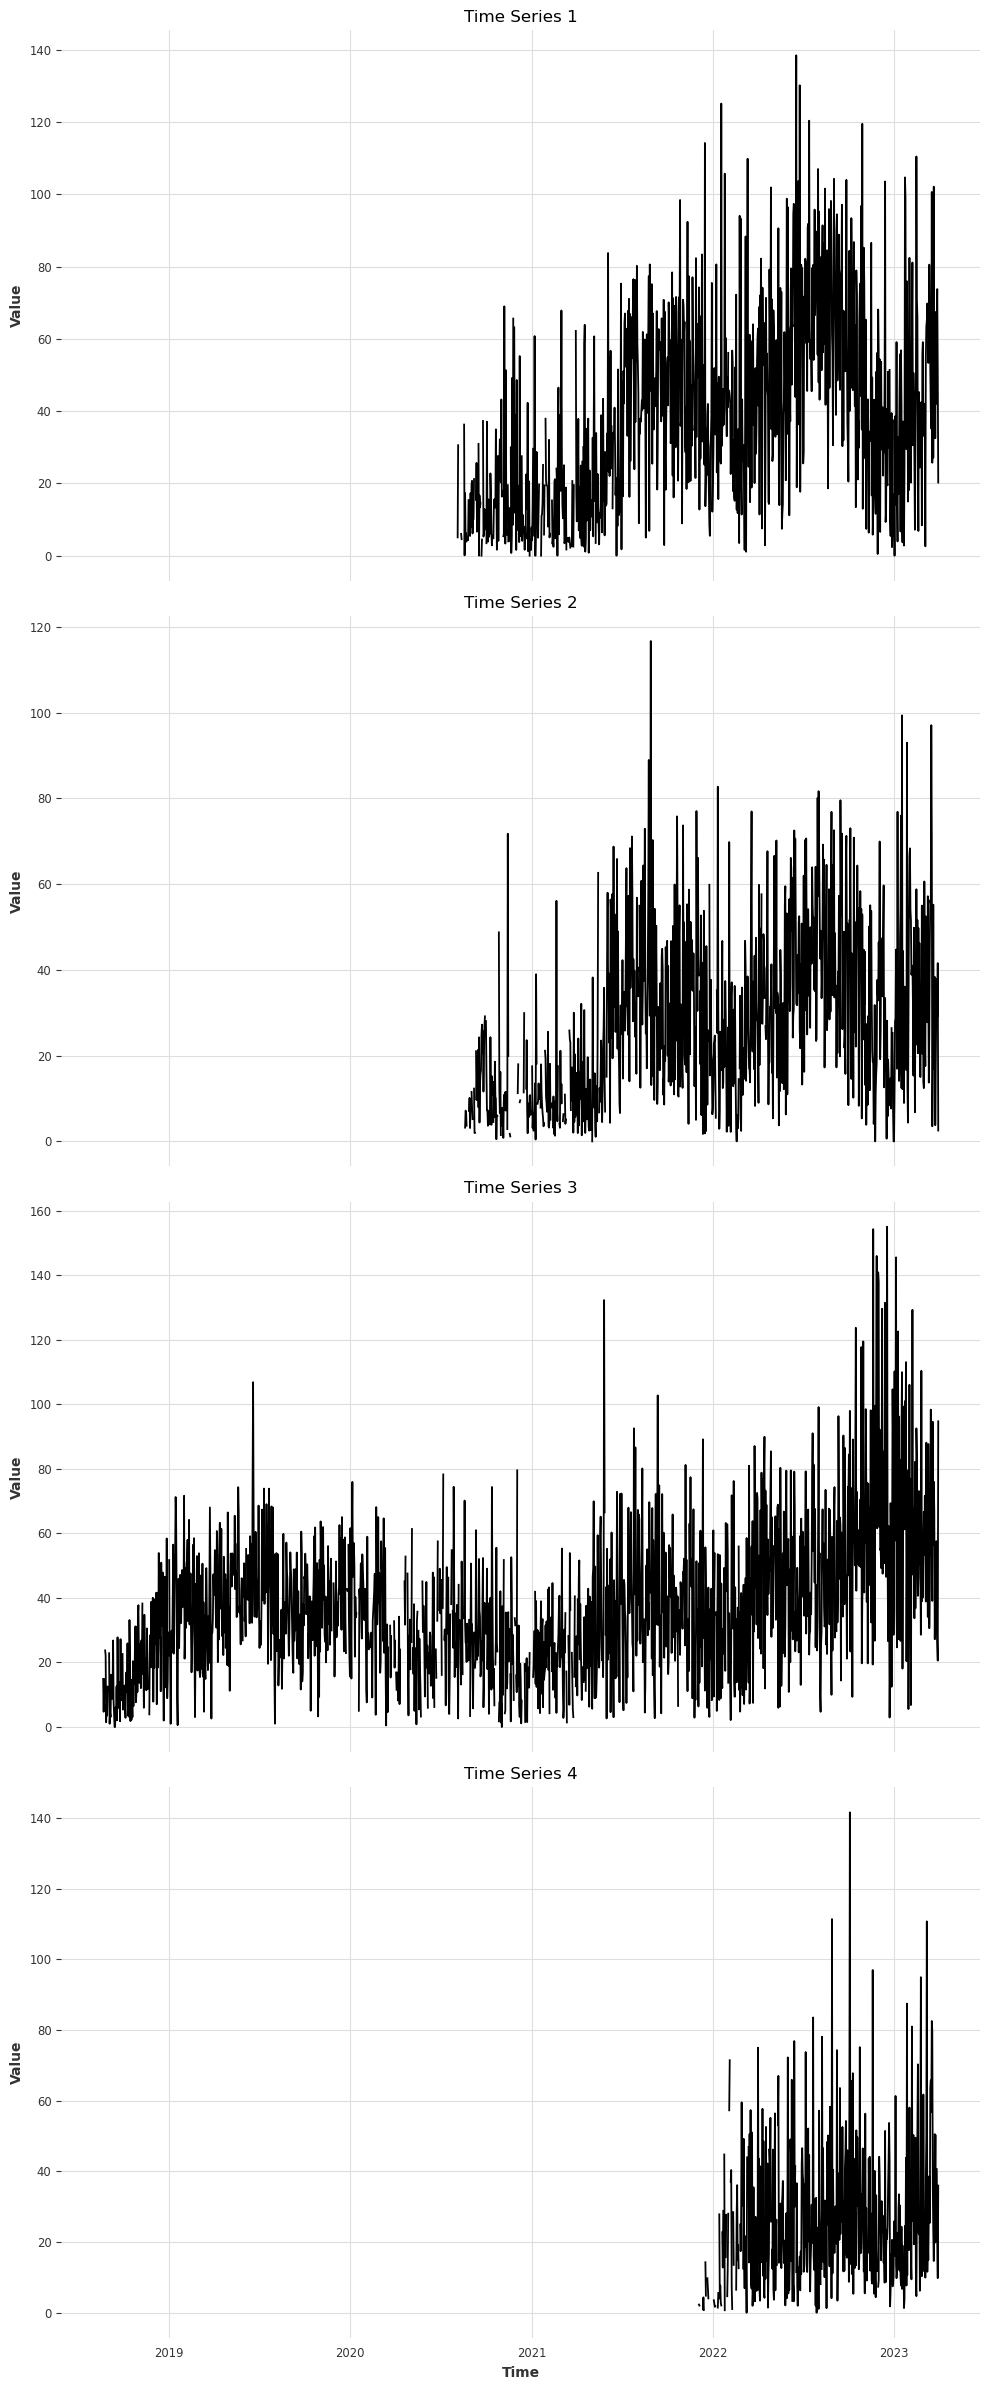

In [12]:
plot_time_series_datasets(df_ts_boulder)